In [ ]:
from tkinter import *
from PIL import Image

def fenetre(x_image,y_image):
    fen = Tk()
    can = Canvas(fen, width =x_image , height =y_image, bg ='red')
    can.pack(side =TOP, padx =5, pady =5)
    can.delete(ALL)
    
    
    imgpil = Image.open("img_test_p.png")
    dim=imgpil.size
    img = PhotoImage(file='img_test_p.png')
    item = can.create_image(dim[0], dim[1], image = img)
     
    #Rajouter cette ligne
    can.image = img
    
    fen.mainloop()
    
fenetre(3500,4200)


# Construction de la grille (traduction depuis MATLAB)


In [1]:
from math import*

#toutes les données en centimètres (m)
altitude=1066.87
d1=7729.12
d2=2362.96
a1=atan(altitude/d1)
a2=atan(altitude/d2)

#longueurs de référence pour le calcul de ce que vaut 5 m en horizontal
L2_pix=216 #pixels
L2_reel=179.06 #centimètres
L1_pix=80 #pixels
L1_reel=174.67 #centimètres

#pour 5m (500 cm), on fait les transformations (pour l'équivalent en pixels):
L2_5_pix=L2_pix*5/L2_reel
L1_5_pix=L1_pix*5/L1_reel

#plage de pixels sur laquelle on fait le modèle
h_p=600
fact=int(abs((d1-d2)/500)) #pour savoir combien de points en vertical on va faire (avant de prolonger la grille)

In [2]:
import numpy as np

#élaboration de la grille
def angle_x(x):
    return float(a2+x*(a1-a2)/(d1-d2))
def l_a_x(a):
    return sin(a)*500

#tous les points tous les 5 m compris sur la ligne travaillée
Y_0=np.linspace(1., 1., fact+1) 
print(Y_0)
for i in range(0,fact+1):
    Y_0[i]=500*i #depuis x=0 jusqu'à x_max = d1-d2
    
#on calcule les distances donc les écarts successifs
Y=np.linspace(1., 1., fact+1) 
somme=0
for i in range(0,fact+1):
    Y[i]=l_a_x(angle_x(Y_0[i]))
    somme=somme+Y[i]
print(Y)
print(somme)
#on scale les données
s=h_p/somme
for i in range (0,fact+1):
    Y[i]=Y[i]*s

print(Y)
somme=0
for i in range(0,fact+1):
    somme=somme+Y[i]
    
print(somme)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[205.74959402 193.49407165 181.10025177 168.57699273 155.93324537
 143.17804665 130.32051319 117.36983475 104.33526767  91.22612825
  78.05178608]
1569.335732139332
[78.66370075 73.97807914 69.23958261 64.45159794 59.61754729 54.74088573
 49.82509881 44.8737     39.89022828 34.87824551 29.84133394]
599.9999999999999


# Tracé de la grille


In [3]:
X1=np.linspace(1., 1., fact+1)
X2=np.linspace(1., 1., fact+1)
X3=np.linspace(1., 1., fact+1)
X4=np.linspace(1., 1., fact+1)

for i in range(1,fact+1):
    Y[i]=Y[i]+Y[i-1]
print(Y)

for i in range(0,fact+1):
    X1[i]=-L2_pix+i*(L2_pix-L1_pix)/fact #on construit les points d'ordonnée selon la règle de proportionnalité 
for i in range(0,fact+1):
    X2[i]=2*X1[i]
    X3[i]=3*X1[i]
    X4[i]=4*X1[i]
    
X0=np.linspace(0., 0., fact+1)
print(X1)

[ 78.66370075 152.64177989 221.8813625  286.33296044 345.95050773
 400.69139346 450.51649227 495.39019227 535.28042055 570.15866606
 600.        ]
[-216.  -202.4 -188.8 -175.2 -161.6 -148.  -134.4 -120.8 -107.2  -93.6
  -80. ]


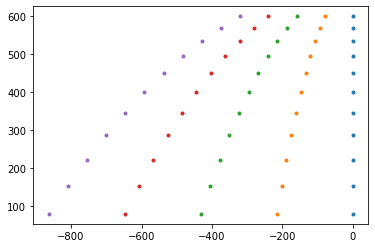

[-216.  -202.4 -188.8 -175.2 -161.6 -148.  -134.4 -120.8 -107.2  -93.6
  -80. ]


In [10]:
import matplotlib.pyplot as plt


plt.plot(X0, Y, '.')
plt.plot(X1, Y, '.')
plt.plot(X2, Y, '.')
plt.plot(X3, Y, '.')
plt.plot(X4, Y, '.')
plt.show()
print(X1)

In [ ]:
# problème de la linéarité pq ???

# Interface graphique

In [14]:
from PIL import Image, ImageTk 
import  tkinter as Tk 
root = Tk.Tk() 

image = Image.open("img_test_p.png") 
photo = ImageTk.PhotoImage(image) 
 
canvas = Tk.Canvas(root, width = image.size[0], height = image.size[1]) 
canvas.create_image(0,0, anchor = Tk.NW, image=photo)
canvas.pack() 
root.mainloop()

TclError: image "pyimage2" doesn't exist